In [1]:
!pip install ultralytics
from os import listdir
from os.path import isfile, join

from os import listdir
from PIL import Image

In [2]:
ONLY_REFUGEE_DIR = '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee'
file_paths = [join(ONLY_REFUGEE_DIR, f) for f in listdir(ONLY_REFUGEE_DIR) if isfile(join(ONLY_REFUGEE_DIR, f))]

def image_valid(file_path):
    try:
        img = Image.open(file_path)  # Open the image file
        img.load()    # Attempt to load the image fully into memory
        img.close()   # Close the image file
        return True
    except (IOError, SyntaxError, OSError, AttributeError) as e:
        print('Problem with file:', file_path, "Error:", e)
        return False

# Assuming file_paths is a list of file paths
invalid_file_paths = [x for x in file_paths if not(image_valid(x))]
valid_file_paths = [x for x in file_paths if image_valid(x)]

print(len(invalid_file_paths) + len(valid_file_paths) == len(file_paths))
print("invalid file example: ", invalid_file_paths[0])
print("num invalid:",len(invalid_file_paths))
print("num valid:", len(valid_file_paths))

Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/11023.jpg Error: image file is truncated (2 bytes not processed)
Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9281.jpg Error: image file is truncated (290 bytes not processed)
Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/6824.jpg Error: image file is truncated
Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/11023.jpg Error: image file is truncated (2 bytes not processed)
Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9281.jpg Error: image file is truncated (290 bytes not processed)
Problem with file: /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/6824.jpg Error: image file is truncated
True
invalid file example:  /content/drive/Othercomputers/My MacBook Pro/data/image_201509_onl

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/Camera_shot_sz320_model.pt')
BATCH_SIZE = 100  # Reduced batch size
data = {}
for i in range(0, len(valid_file_paths), BATCH_SIZE):
    batch_results = model(valid_file_paths[i:i+BATCH_SIZE], imgsz=320)
    for result in batch_results:
        data[result.path] = result.probs.data.cpu().numpy()

In [24]:
import pandas as pd
df = pd.DataFrame.from_dict(data, orient='index', columns=['CS', 'ECS', 'FS', 'LS', 'MS'])
df.to_csv('out.csv')
df.head()

,CS,ECS,FS,LS,MS
/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9743.jpg,0.998684,0.001147,0.000073,0.000053,0.000042
/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9734.jpg,0.513514,0.481272,0.002291,0.001125,0.001797
/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9740.jpg,0.844937,0.143756,0.000108,0.000025,0.011175
/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9739.jpg,0.002620,0.001926,0.454750,0.088785,0.451919
/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9718.jpg,0.073927,0.003456,0.017573,0.003437,0.901607


In [29]:
valid_file_paths[0:10]

['/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9743.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9734.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9740.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9739.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9718.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9745.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9746.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9748.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9749.jpg',
 '/content/drive/Othercomputers/My MacBook Pro/data/image_201509_onlyrefugee/9750.jpg']


0: 320x320 CS 1.00, ECS 0.00, FS 0.00, LS 0.00, MS 0.00, 1: 320x320 CS 0.51, ECS 0.48, FS 0.00, MS 0.00, LS 0.00, 2: 320x320 CS 0.84, ECS 0.14, MS 0.01, FS 0.00, LS 0.00, 3: 320x320 FS 0.45, MS 0.45, LS 0.09, CS 0.00, ECS 0.00, 4: 320x320 MS 0.90, CS 0.07, FS 0.02, ECS 0.00, LS 0.00, 5: 320x320 ECS 0.56, CS 0.34, LS 0.09, FS 0.01, MS 0.00, 6: 320x320 MS 0.98, FS 0.02, CS 0.00, ECS 0.00, LS 0.00, 7: 320x320 LS 0.96, FS 0.03, CS 0.00, MS 0.00, ECS 0.00, 8: 320x320 CS 0.90, MS 0.08, ECS 0.02, FS 0.00, LS 0.00, 9: 320x320 CS 0.90, MS 0.08, ECS 0.02, FS 0.00, LS 0.00, 7.9ms
Speed: 2.0ms preprocess, 0.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/classify/predict
/content/runs/classify/predict/9739.jpg


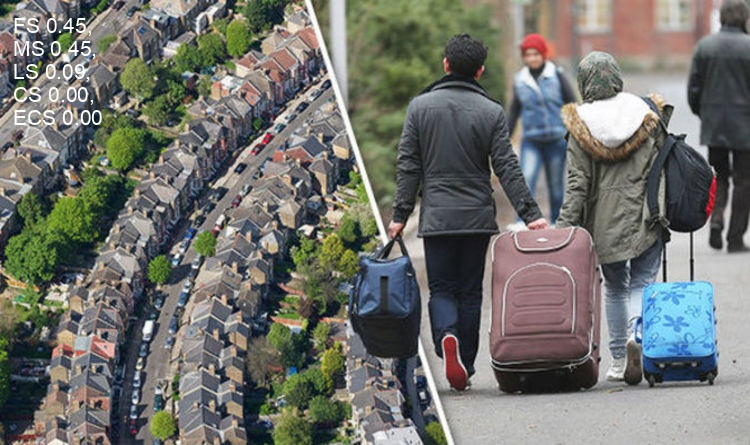

/content/runs/classify/predict/9745.jpg


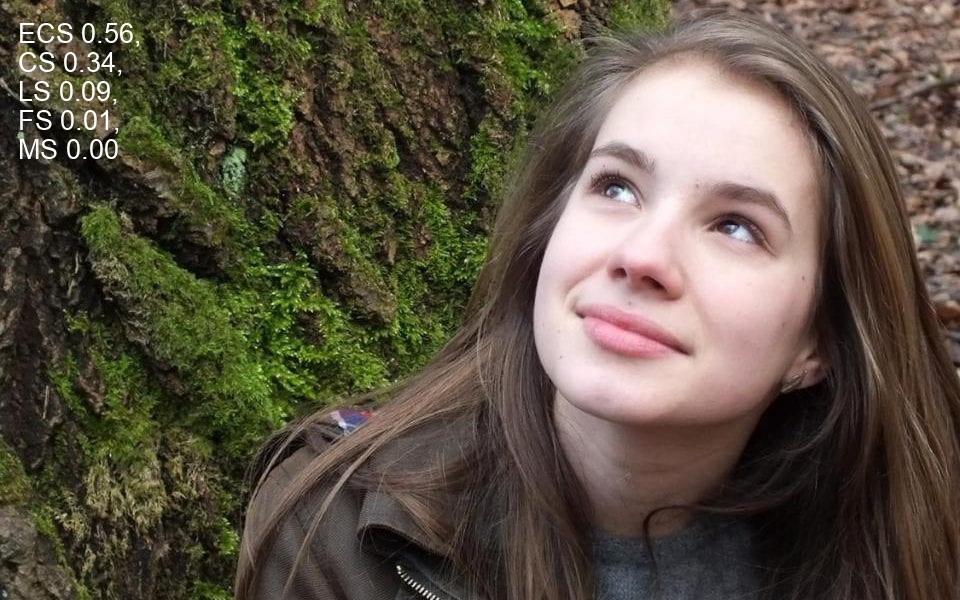

/content/runs/classify/predict/9750.jpg


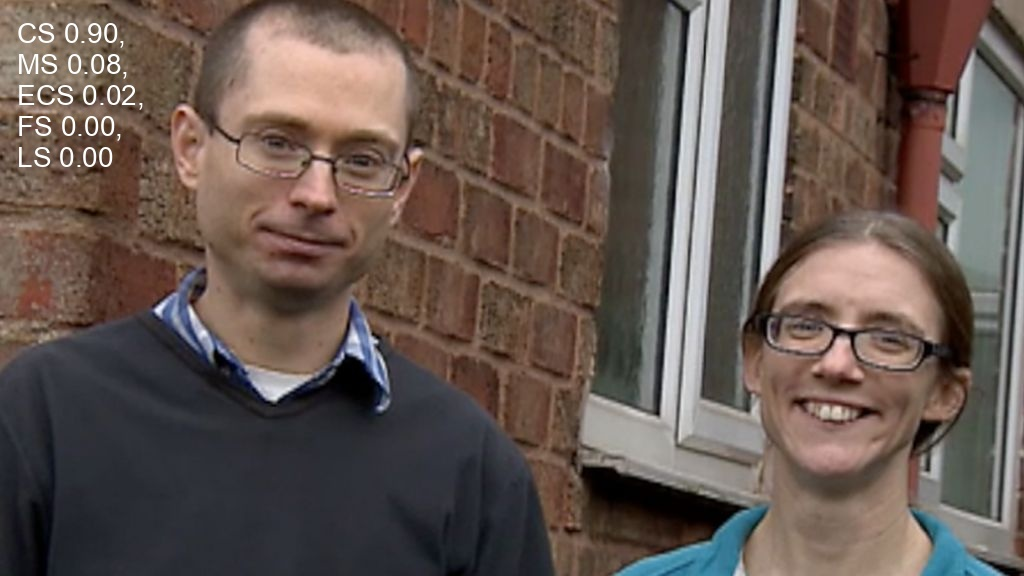

/content/runs/classify/predict/9718.jpg


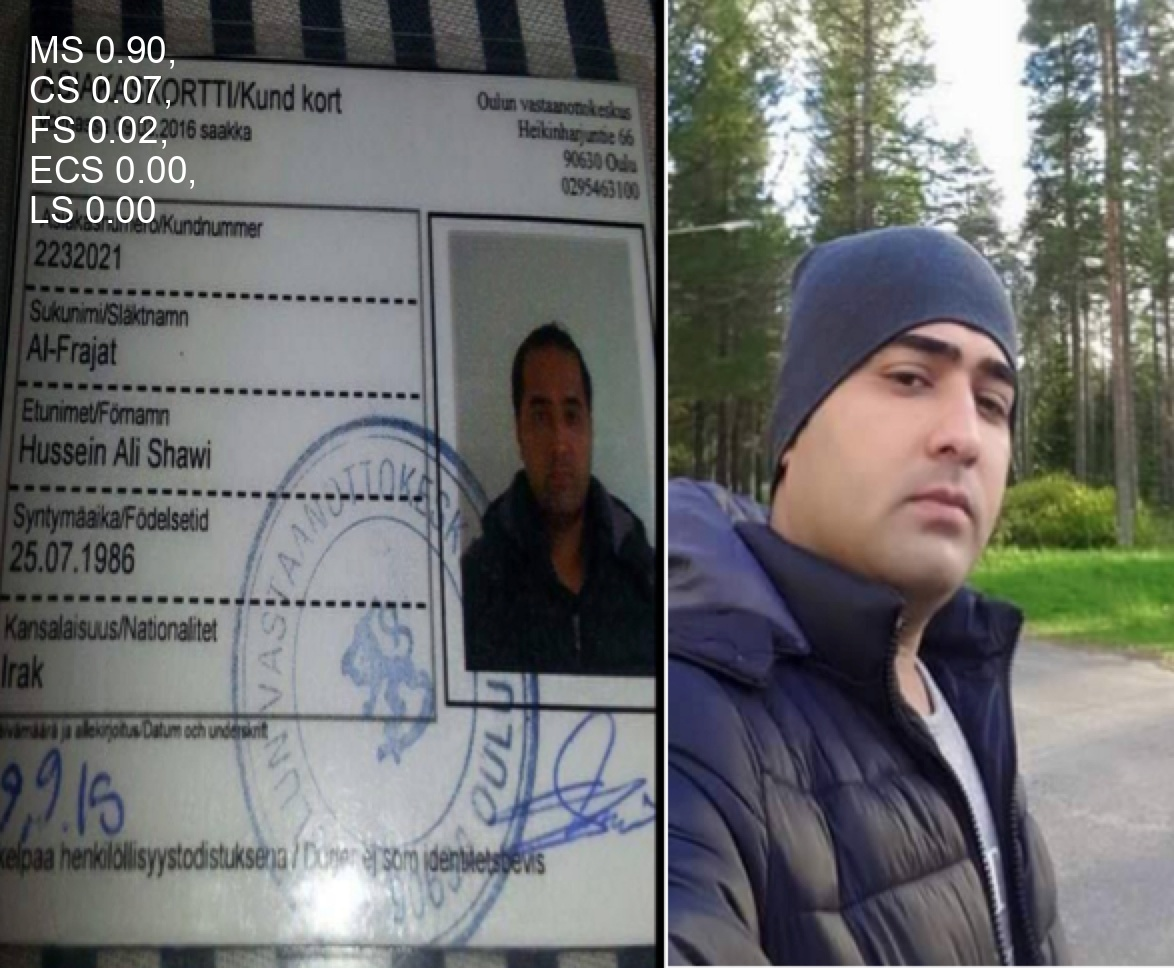

/content/runs/classify/predict/9734.jpg


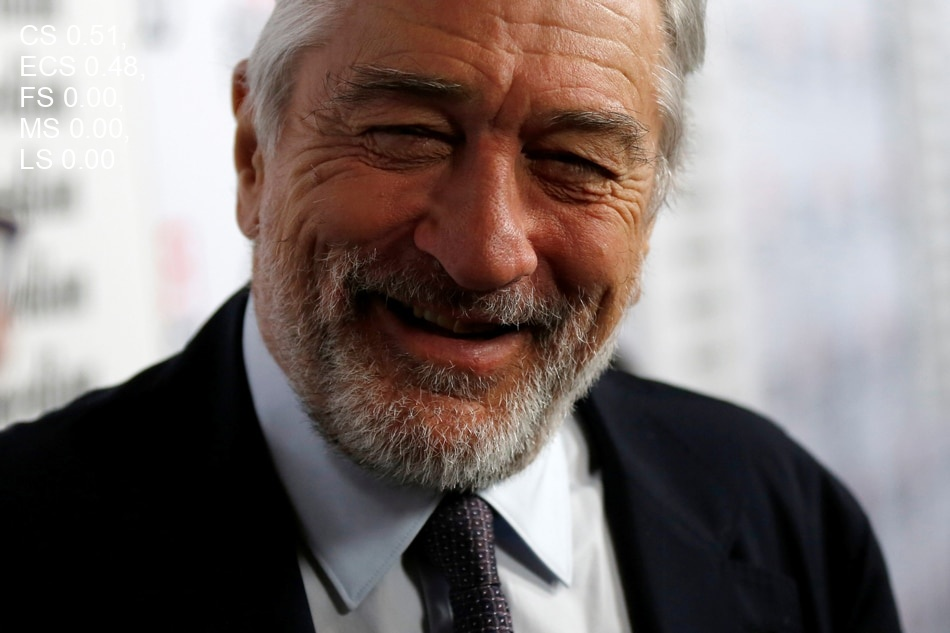

/content/runs/classify/predict/9748.jpg


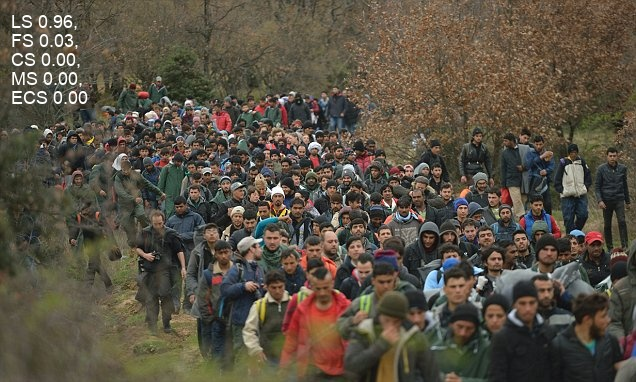

/content/runs/classify/predict/9743.jpg


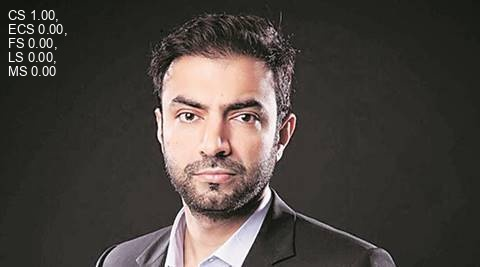

/content/runs/classify/predict/9749.jpg


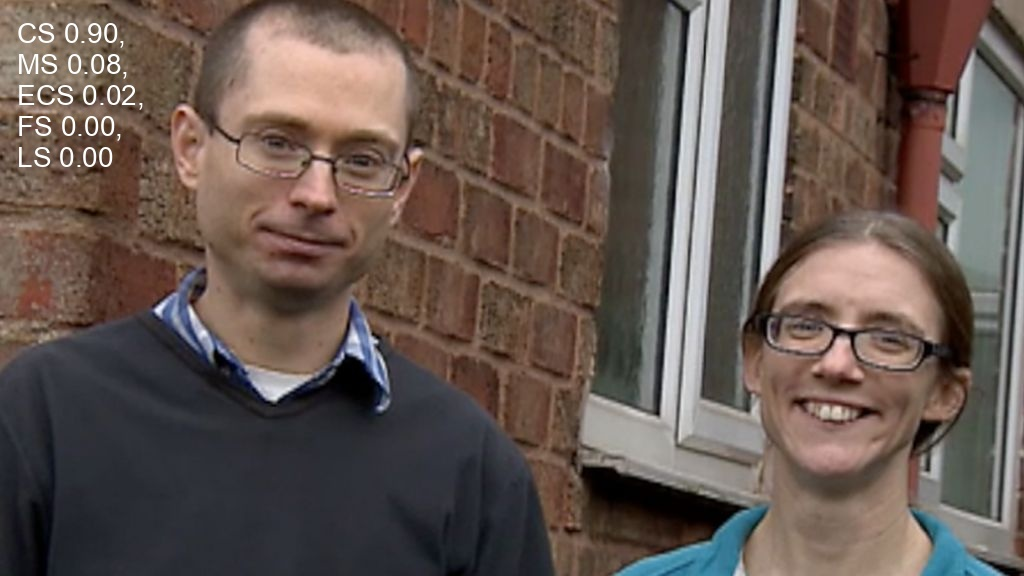

/content/runs/classify/predict/9740.jpg


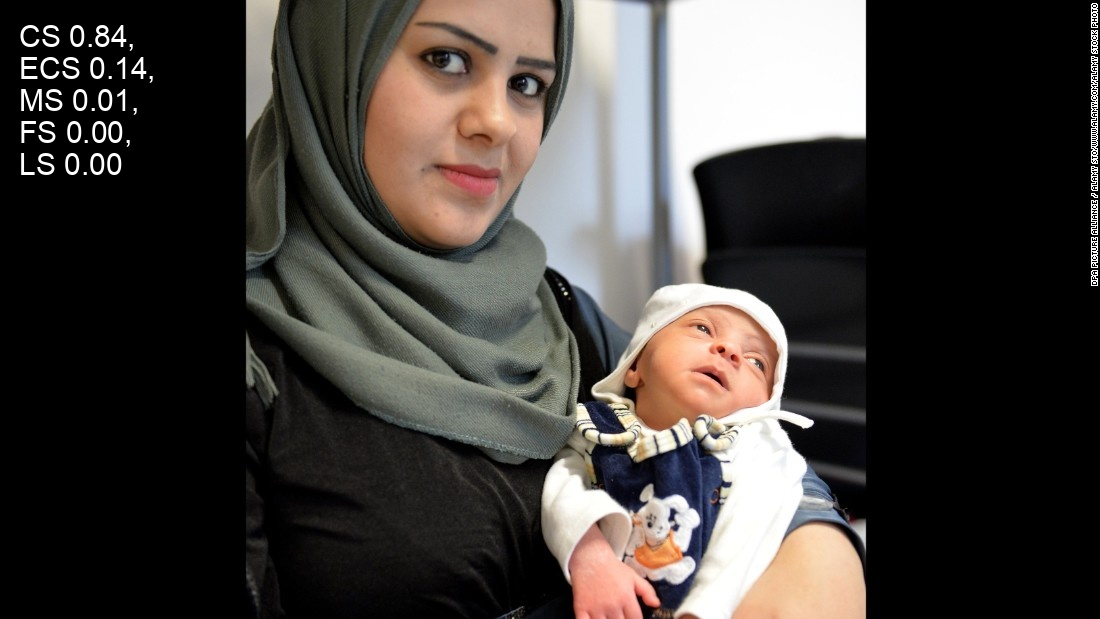

/content/runs/classify/predict/9746.jpg


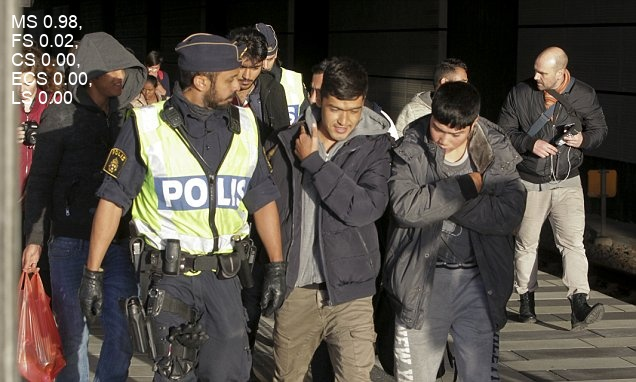

In [31]:
# Show the predictions for first 10 images
import glob
from IPython.display import Image, display

model(valid_file_paths[0:10], imgsz=320, save=True)

for i, image_path in enumerate(glob.glob(f'/content/runs/classify/predict/*.jpg')):
  print(image_path)
  display(Image(filename=image_path, height=320))